# Соревноване titanic

Подключение библеотек

In [56]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

путь к датасетам

In [57]:
HOUSE_PRICES_PATH = '/Users/Dimka/Documents/Programming/kaggle/titanic/datasets/'
DATASET_PATH = HOUSE_PRICES_PATH + 'train.csv'
DATASET_PATH_TEST = HOUSE_PRICES_PATH + 'test.csv'
# SUBMISSION_DATASET_PATH = HOUSE_PRICES_PATH + 'submission.csv'
PREPARED_DATASET_PATH = HOUSE_PRICES_PATH + 'gender_submission.csv'

In [58]:
train_data = pd.read_csv(DATASET_PATH)
test_data = pd.read_csv(DATASET_PATH_TEST)
td = pd.concat([train_data, test_data], ignore_index=True, sort = False)

In [59]:
td['Family'] = td.Parch + td.SibSp


In [60]:
td['Is_Alone'] = td.Family == 0

In [61]:
td['Fare_Category'] = pd.cut(td['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])

In [62]:
td.Embarked.fillna(td.Embarked.mode()[0], inplace = True)

In [63]:
td.Cabin = td.Cabin.fillna('NA')

In [64]:
td['Salutation'] = td.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [65]:
grp = td.groupby(['Sex', 'Pclass'])

In [66]:
grp.Age.apply(lambda x: x.fillna(x.median()))
td.Age.fillna(td.Age.median, inplace = True)

In [67]:
td['Sex'] = LabelEncoder().fit_transform(td['Sex'])

In [68]:
pd.get_dummies(td.Embarked, prefix="Emb", drop_first = True)

,Emb_Q,Emb_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,1
1305,0,0
1306,0,1
1307,0,1


In [69]:
td.drop(['Pclass', 'Fare','Cabin', 'Fare_Category','Name','Salutation', 'Ticket','Embarked', 'SibSp', 'Parch', 'Age'], axis=1, inplace=True)

NB Accuracy: 82.12%
The cross validated score for Random forest is: 79.07


Text(0.5, 1.05, 'Confusion_matrix for NB')

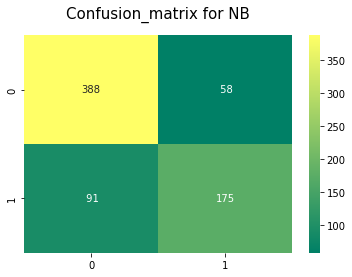

In [70]:
# Data to be predicted
X_to_be_predicted = td[td.Survived.isnull()]
X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)
# X_to_be_predicted[X_to_be_predicted.Age.isnull()]
# X_to_be_predicted.dropna(inplace = True) # 417 x 27
#Training data
train_data = td
train_data = train_data.dropna()
feature_train = train_data['Survived']
label_train = train_data.drop(['Survived'], axis = 1)
##Gaussian
clf = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train, np.ravel(y_train))
print("NB Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for NB', y=1.05, size=15)


In [71]:
# ##Random forest
# clf = RandomForestClassifier(criterion='entropy',
# n_estimators=700,
# min_samples_split=10,
# min_samples_leaf=1,
# max_features='auto',
# oob_score=True,
# random_state=1,
# n_jobs=-1)
# x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
# clf.fit(x_train, np.ravel(y_train))
# print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")
# result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
# print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
# y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
# sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
# plt.title('Confusion_matrix for RF', y=1.05, size=15)

In [72]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions.csv
